<a href="https://colab.research.google.com/github/vivianawah/Viviana/blob/main/Python_Notebook_Setup_by_Viviana_Wah_(Research_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question #1 : Is there an association between the words the respondent didn’t name and often forget about their actions?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


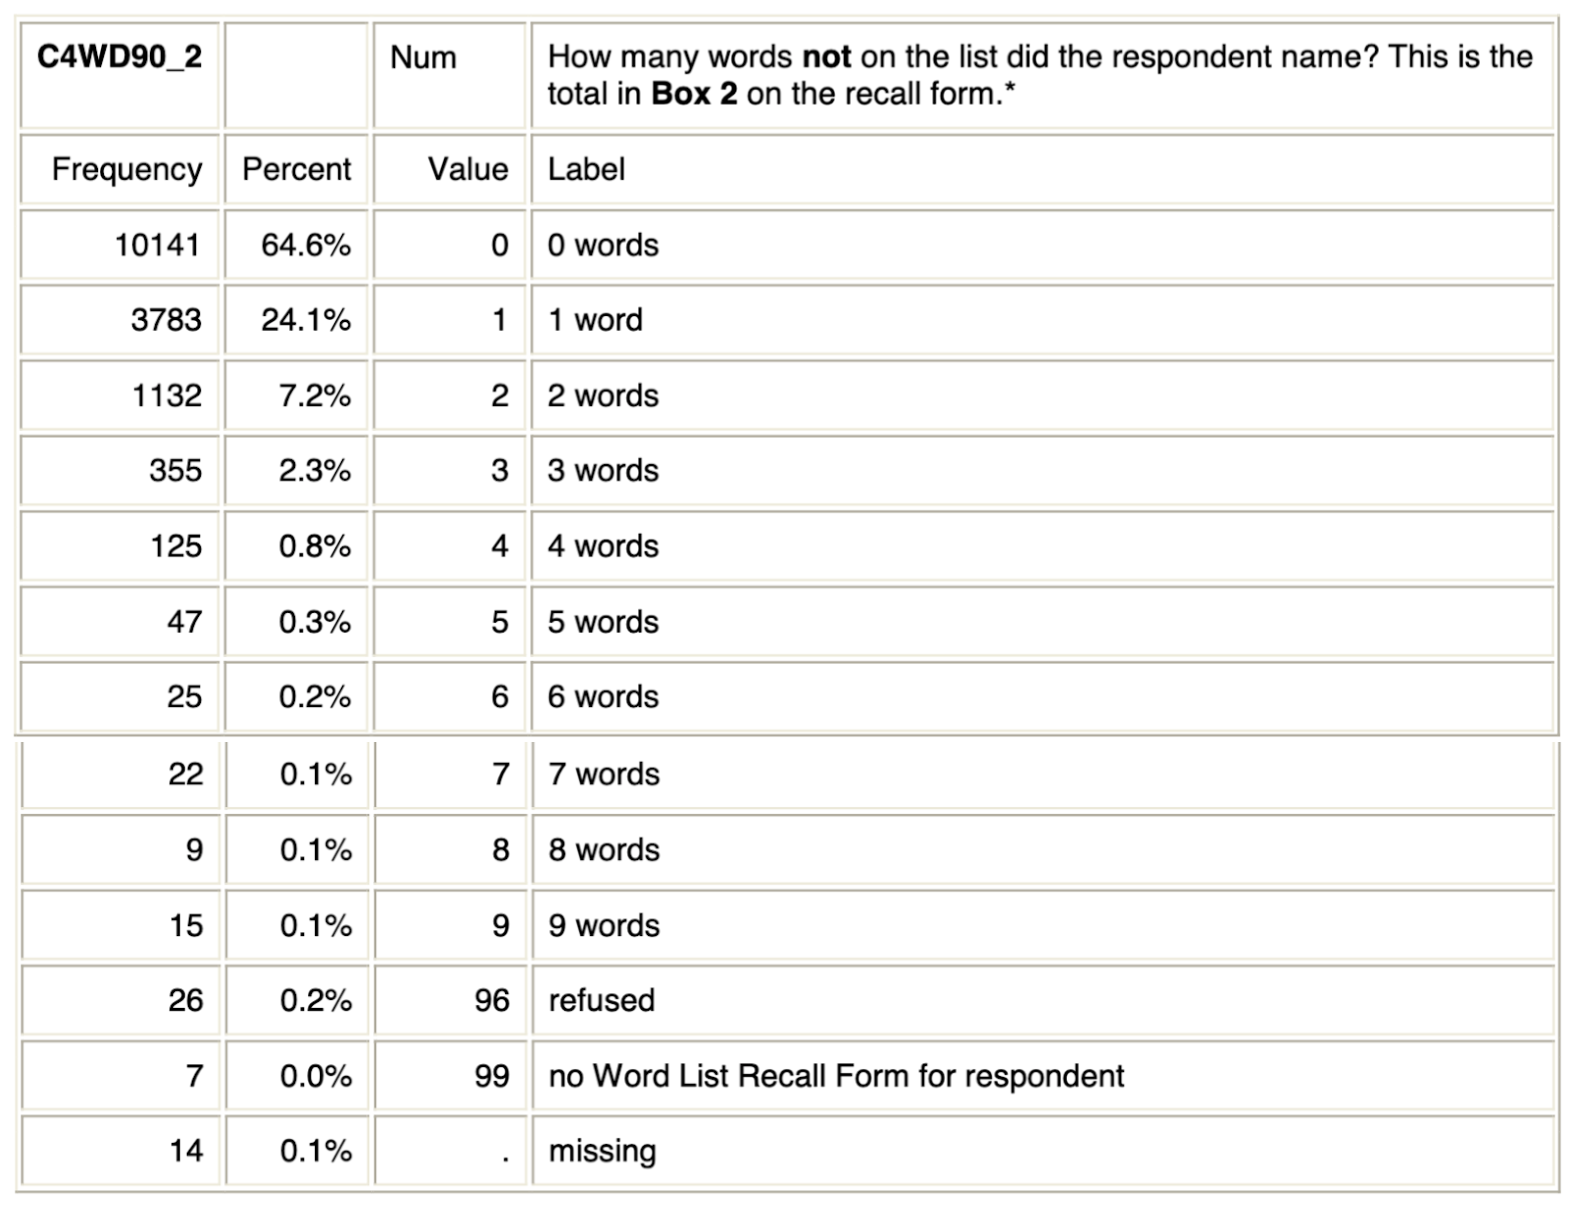Codebook 1

In [ ]:
df['C4WD90_2']

0        
1       0
2        
3       0
4        
       ..
6499    0
6500    1
6501    0
6502    1
6503    0
Name: C4WD90_2, Length: 6504, dtype: object

In [ ]:
df['Unnamed_Words'] = df['C4WD90_2']

In [ ]:
df['Unnamed_Words'].dtype

dtype('O')

In [ ]:
df['Unnamed_Words'] = pd.to_numeric(df['Unnamed_Words'], errors ='coerce')
df['Unnamed_Words'] = df['Unnamed_Words'].loc[ df['Unnamed_Words'] !=' ' ]
df['Unnamed_Words'] = df['Unnamed_Words'].loc[ df['Unnamed_Words'] < 96 ]
df['Unnamed_Words'].describe()

count    5101.000000
mean        0.533621
std         0.939074
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: Unnamed_Words, dtype: float64

<Axes: xlabel='Unnamed_Words', ylabel='Count'>

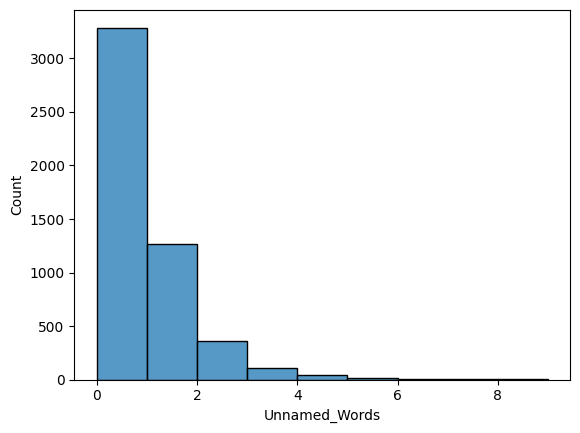

In [ ]:
sns.histplot(x ='Unnamed_Words', data = df, bins = 9)

<Axes: xlabel='Unnamed_Words'>

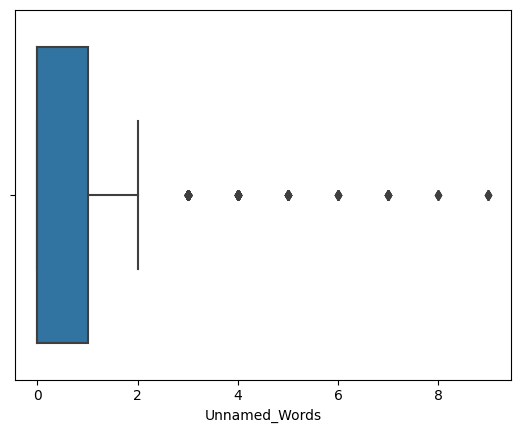

In [ ]:
sns.boxplot(x ='Unnamed_Words', data = df)

Codebook 2: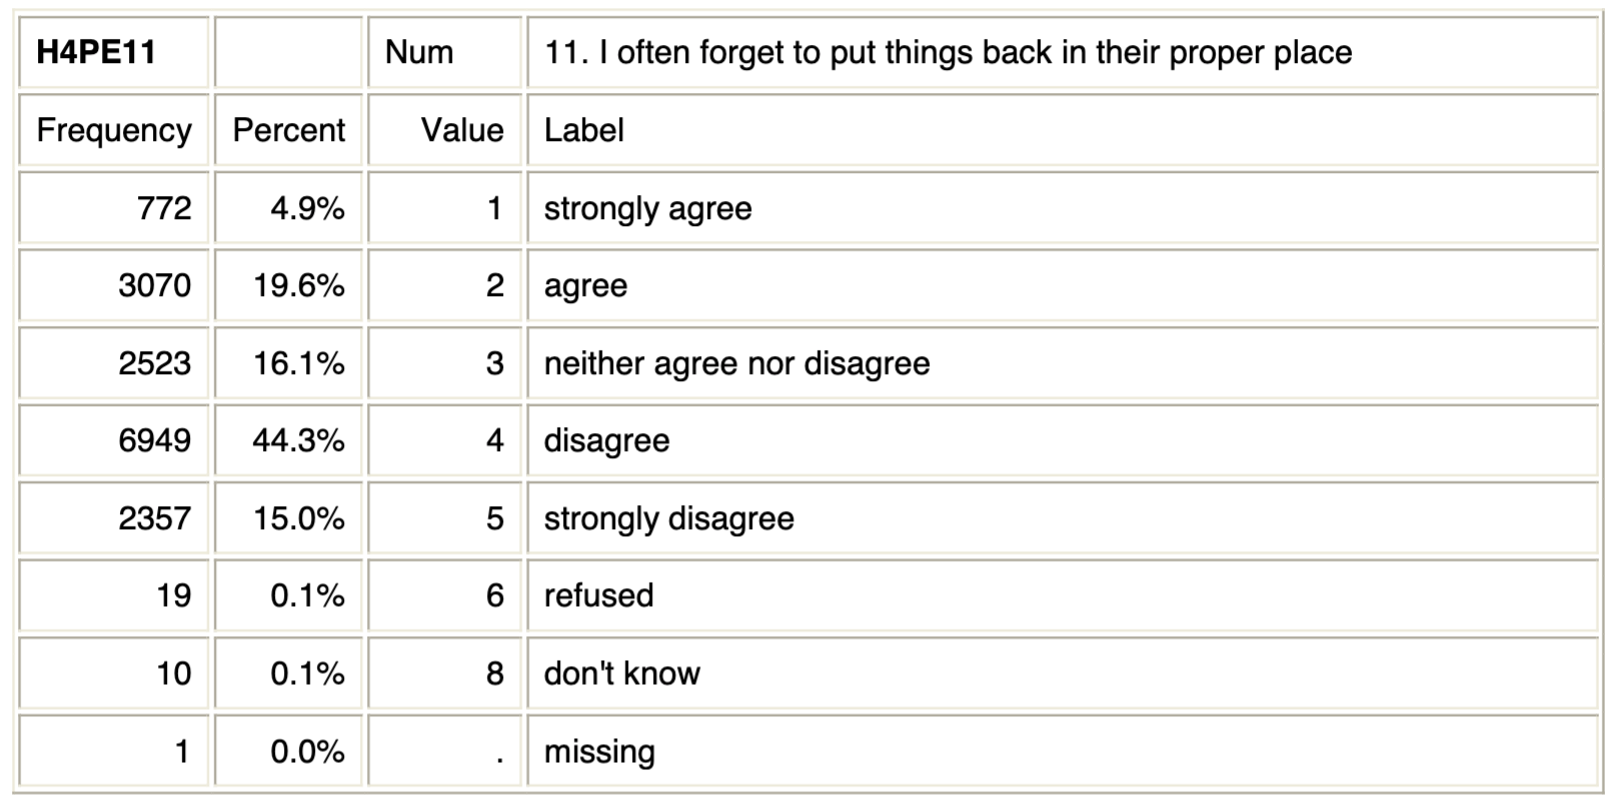

In [ ]:
df['H4PE11'].value_counts()

4    2257
     1391
2    1054
3     794
5     777
1     221
6       7
8       3
Name: H4PE11, dtype: int64

In [ ]:
df['Forget_Actions'] = df['H4PE11']
df['Forget_Actions'].value_counts()

4    2257
     1391
2    1054
3     794
5     777
1     221
6       7
8       3
Name: Forget_Actions, dtype: int64

In [ ]:
df['Forget_Actions'] = df['Forget_Actions'].loc[ df['Forget_Actions'] !=' ' ]
df['Forget_Actions'] = df['Forget_Actions'].loc[ df['Forget_Actions'] !='6' ]
df['Forget_Actions'] = df['Forget_Actions'].loc[ df['Forget_Actions'] !='8' ]
df['Forget_Actions'].value_counts()

4    2257
2    1054
3     794
5     777
1     221
Name: Forget_Actions, dtype: int64

In [ ]:
df['Forget_Actions'].replace(['1','2','3','4','5'] , ['strongly agree','agree','neither agree or disagree','disagree','strongly disagree'], inplace = True)
df['Forget_Actions'].value_counts()

disagree                     2257
agree                        1054
neither agree or disagree     794
strongly disagree             777
strongly agree                221
Name: Forget_Actions, dtype: int64

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp

In [ ]:
rp.summary_cat(df['Forget_Actions'])

,Variable,Outcome,Count,Percent
0,Forget_Actions,disagree,2257,44.23
1,,agree,1054,20.65
2,,neither agree or disagree,794,15.56
3,,strongly disagree,777,15.23
4,,strongly agree,221,4.33


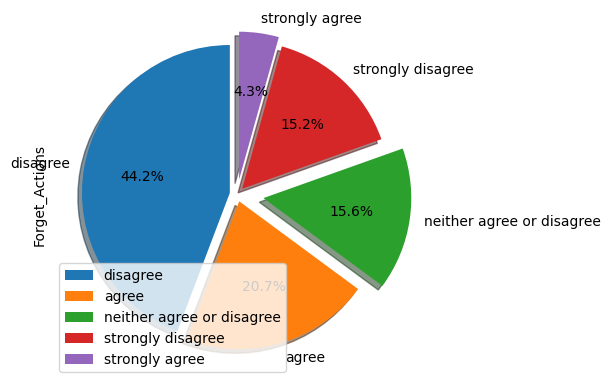

In [ ]:
explode = (0.05, 0.05, 0.18, 0.05, 0.1)
df['Forget_Actions'].value_counts().plot(kind ='pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=90)
plt.legend(loc ="lower left")

<Axes: title={'center': 'I often forget to put things back in their proper places'}, ylabel='Percent'>

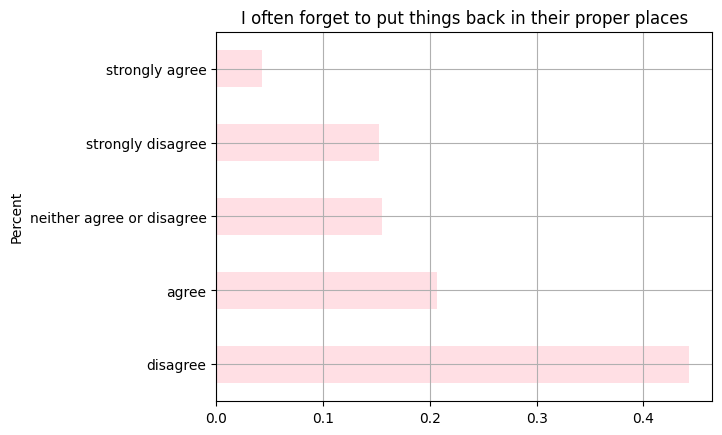

In [ ]:
plt.xlabel("Amount of Limitations")
plt.ylabel("Percent")
plt.title("I often forget to put things back in their proper places")
df['Forget_Actions'].value_counts(normalize = True).plot(kind ='barh', color = 'pink', width = 0.5, alpha = 0.5, grid = True)